# MLP 실습 : 연관 규칙 분석

## data/library 불러오기

In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("Market_Basket.csv",header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(7501, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


## Transaction data로 변환

In [12]:
data.shape[1]

20

In [14]:
data.isnull().sum(axis=1)[1]

17

In [15]:
transactions=[]
for i in range(data.shape[0]):
    # list comprehension 사용
    transactions.append([str(data[j][i]) for j in range(data.shape[1]-data.isnull().sum(axis=1)[i])])
    #list 안에 list 생성 
    #list 길이 가변적으로 조정 i행의 전체 열 개수 - i행의 빈행의 개수= i 번째 append되는 list의 길이
    

In [17]:
transactions[:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

## model 학습하기

- 하이퍼 파라미터 : 지지도,신뢰도,향상도

In [49]:
from apyori import apriori

In [81]:
rules=apriori(transactions,min_support=0.015,min_confidence=0.2  ,min_lift=1,min_length=1)

In [82]:
rules

<generator object apriori at 0x00000189F4A80D60>

## 결과 확인하기

In [83]:
results=list(rules)
results[:3]

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'eggs', 'burgers'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'french fries', 'burgers'}), support=0.021997067057725635, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.25229357798165136, lift=1.4761732671141707)])]

In [146]:
results[3].ordered_statistics

[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'green tea'}), confidence=0.2003058103975535, lift=1.5161391360161947)]

In [140]:
results[3].items

frozenset({'burgers', 'green tea'})

In [84]:
print(len(results))

78


In [ ]:
def getOS(attr):
    if attr=="items_base":
        

In [176]:
df=pd.DataFrame(results)
str(df['ordered_statistics'][1])[1:-2].split(',')[0]

"OrderedStatistic(items_base=frozenset({'burgers'})"

In [132]:
df.head()

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(eggs, burgers)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
2,"(french fries, burgers)",0.021997,"[((burgers), (french fries), 0.252293577981651..."
3,"(burgers, green tea)",0.017464,"[((burgers), (green tea), 0.2003058103975535, ..."
4,"(milk, burgers)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."


In [98]:
df.to_csv("apriori_result_practice.csv")

In [130]:
print(df.iloc[0:19][['items','support']])

                             items   support
0                  (mineral water)  0.238368
1                  (eggs, burgers)  0.028796
2          (french fries, burgers)  0.021997
3             (burgers, green tea)  0.017464
4                  (milk, burgers)  0.017864
5         (burgers, mineral water)  0.024397
6             (burgers, spaghetti)  0.021464
7                     (cake, eggs)  0.019064
8             (cake, french fries)  0.017864
9            (cake, mineral water)  0.027463
10               (cake, spaghetti)  0.018131
11        (mineral water, chicken)  0.022797
12            (spaghetti, chicken)  0.017198
13               (eggs, chocolate)  0.033196
14           (escalope, chocolate)  0.017598
15       (french fries, chocolate)  0.034395
16  (frozen vegetables, chocolate)  0.022930
17        (ground beef, chocolate)  0.023064
18               (milk, chocolate)  0.032129


## 연관 품목의 시각화

In [88]:
ar=(df.iloc[1:74]['items'])
ar

1                       (eggs, burgers)
2               (french fries, burgers)
3                  (burgers, green tea)
4                       (milk, burgers)
5              (burgers, mineral water)
                    ...                
69    (whole wheat rice, mineral water)
70               (olive oil, spaghetti)
71                (spaghetti, pancakes)
72                  (shrimp, spaghetti)
73                (tomatoes, spaghetti)
Name: items, Length: 73, dtype: object

### network로 표현하기


In [89]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

### 한글 폰트 설정

In [90]:
ko_font_location = "C:/Windows/Fonts/malgun.ttf"
ko_font_name = font_manager.FontProperties(fname=ko_font_location).get_name()

### network diagram

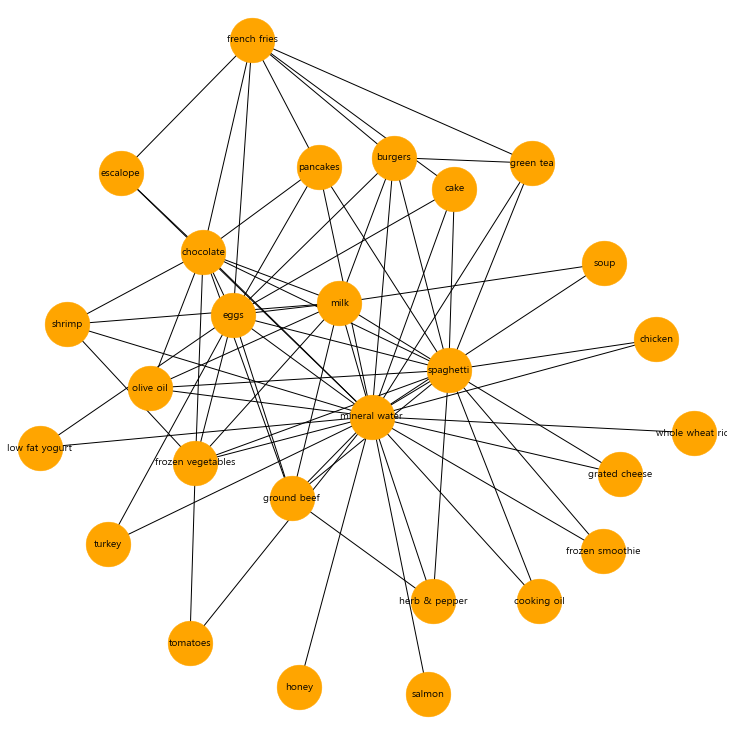

In [93]:
plt.figure(figsize=(10,10)) 
nx.draw_kamada_kawai(G)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_family=ko_font_name, font_size=10, font_color='black')
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
plt.show()